## Assignment #1 Solution

In [1]:
# Packages we'll need for this assignment
import pandas as pd  # Pandas can be used to read in the data from the CSV file, and also for some calculations
import numpy as np  # Numpy is a Python math library, it can be used for resampling and associated calculations
import random as rand  # Pythons library for randomization

In [2]:
# Packages needed for drawing box plots and histogram
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------
### 1. Create side-by-side boxplots for the number of mosquitos in each group (beer vs water)

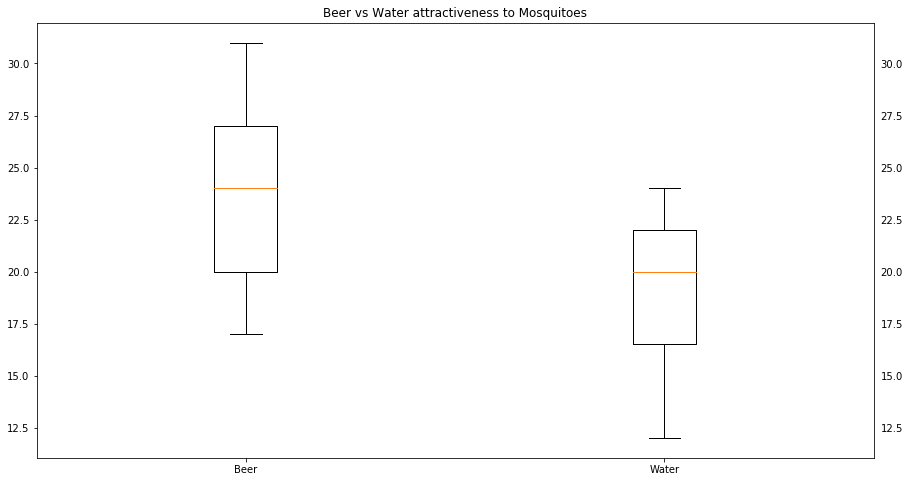

In [3]:
# Read the data using Pandas
dataFrame = pd.read_csv("mosquitos_data.csv")
beerData = dataFrame[dataFrame.Treatment == 'Beer'].Response
waterData = dataFrame[dataFrame.Treatment == 'Water'].Response

data = [beerData, waterData]
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_title('Beer vs Water attractiveness to Mosquitoes')
ax1.tick_params(labelright=True)
ax1.boxplot(data)
ax1.set_xticklabels(["Beer", "Water"])
plt.show()


### 2. Answer the question: What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitos?

it is evident by looking at the box plots that the Mosquitos found subjects that drank beer more attractive. As shown in the data, the median of the Beer group is found to be higher than the third quartile of water group which shows that almost more than half of the data in beer group was larger than the maximum value reported in interquartile range of water group. Thus the difference in the groups of data is very significant.

### 3. Calculate basic statistics measures for each group: the mean, median, standard deviation

In [4]:
# Calculate Mean
beerMean = sum(beerData) / len(beerData)
print("Mean for beer group is %s" % beerMean)
waterMean = sum(waterData) / len(waterData)
print("Mean for water group is %s" % waterMean)

# Calculate Median
beerMedian = np.median(beerData)
waterMedian = np.median(waterData)

print("Median for water group is", waterMedian)
print("Median for beer group is", beerMedian)

# Calculate Standard Deviation

squarredError = 0

for item in beerData:
    squarredError += (item - beerMean)**2
    
beerSD = (squarredError/(len(beerData) - 1))**(1/2)

print("Standard Deviation for Beer Group is", beerSD)

squarredError = 0

for item in waterData:
    squarredError += (item - waterMean)**2
    
waterSD = (squarredError/(len(waterData) - 1))**(1/2)

print("Standard Deviation for Water Group is", waterSD)


Mean for beer group is 23.6
Mean for water group is 19.2222222222
Median for water group is 20.0
Median for beer group is 24.0
Standard Deviation for Beer Group is 4.13319892255
Standard Deviation for Water Group is 3.67112028991


### 4. Explain the numbers
#### After calculating the mean, median, and standard deviation for the beer and water groups, what can we learn from these numbers? Is the difference in means consistent with the difference in medians? Why might means and medians be different, could the standard deviation hold some clues?

For beer group the mean is greater than the median which means that the distribution is skewed towards the higher values(more mosquitos), on the contrary the water group's distribution is skewed towards the lower values(less mosquitos) resulting from lesser mean than its median. The difference in means is very consistent with the difference in medians which shows that the data in both of the groups have similar amount of outliers. Difference in means and medians shows the presence of outliers. Also having outliers increases the standard deviation. 

### 5. Write the code to implement the data simulation demonstrated in the video

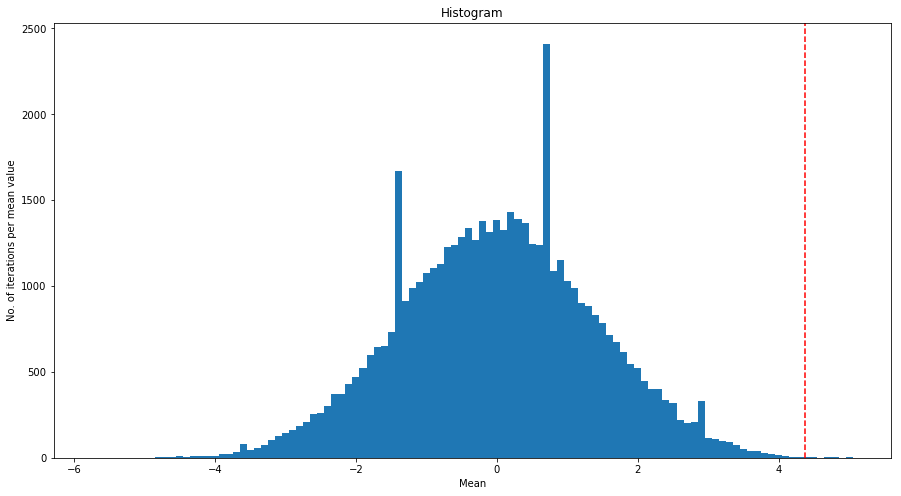

In [5]:
df = pd.read_csv("mosquitos_data.csv") # Read Data into new frame 
noOfIterations = 50000 # Number of iterations to run
data = [None] * noOfIterations # Array to hold output for each iteration
meanDiff = beerMean - waterMean

for index in range(0, noOfIterations):
    labels = df["Treatment"].tolist()  # Convert the treatment data to a list
    rand.shuffle(labels)               # Shuffle the lables, notice that this happens in place
    df["Treatment"] = labels   # Set the 'Treatment' column to contain the shuffled labels
    bd = df[df.Treatment == 'Beer'].Response # get beer Data from shuffled list
    wd = df[df.Treatment == 'Water'].Response # get water Data from shuffled list
    bMean = sum(bd) / len(bd) # Calulate Beer mean
    wMean = sum(wd) / len(wd) # Calculate Water mean
    data[index] = bMean - wMean # differnce between means

# the histogram of the data
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(data, bins=np.arange(min(data), max(data) + 0.1, 0.1))
ax.set_xlabel('Mean')
ax.set_ylabel('No. of iterations per mean value')
ax.set_title(r'Histogram')
plt.axvline(x=meanDiff, color='r', linestyle='--') # Show the line for original results
plt.show()
